In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# COMBINING ALL THE ANNUAL CAMPAIGN DATA
df_2022 = pd.read_csv("Bottoms Up Ball/2022 Bottoms Up Ball - Active.csv")
df_2023 = pd.read_csv("Bottoms Up Ball/2023 Bottoms Up Ball - Active.csv")
annual_campaigns = pd.concat([df_2022, df_2023])
annual_campaigns.reset_index(drop=True, inplace=True)

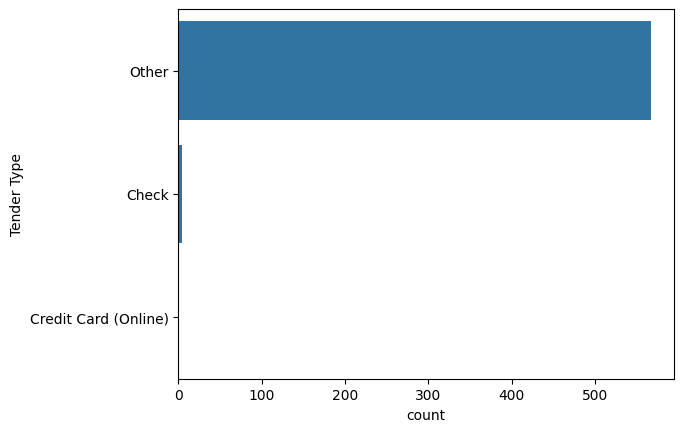

In [4]:
sns.countplot(y='Tender Type', data=annual_campaigns)
plt.show()

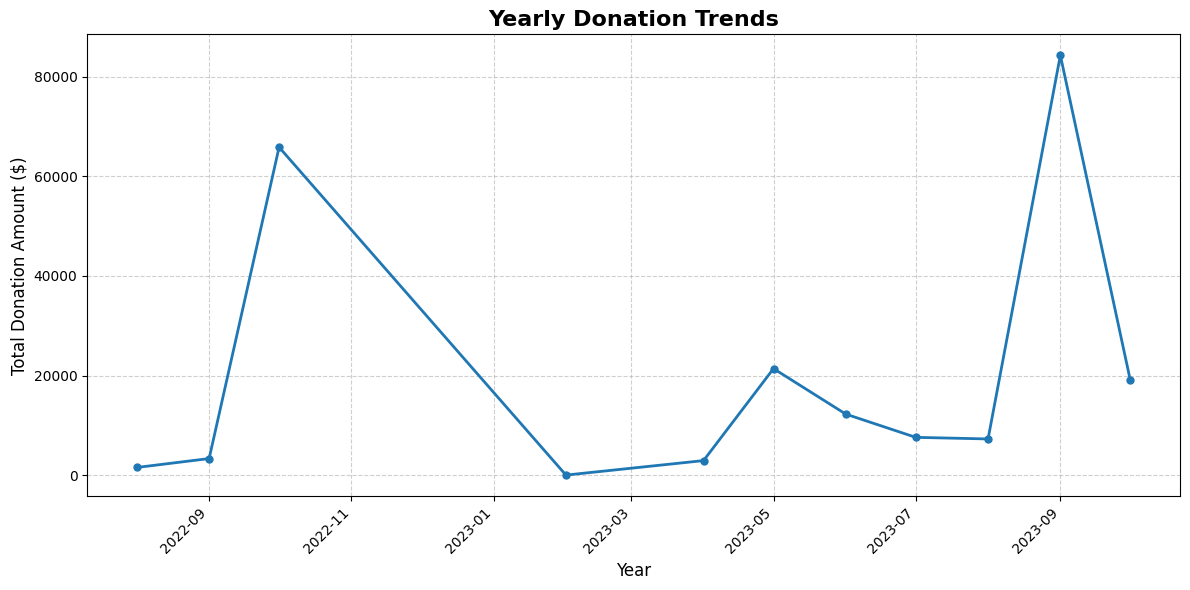

In [5]:
annual_campaigns['Donation Date'] = pd.to_datetime(annual_campaigns['Donation Date'])
annual_campaigns['YearMonth'] = annual_campaigns['Donation Date'].dt.to_period('M')

# Plot monthly donation trends
monthly_trends = annual_campaigns.groupby('YearMonth')['Donation Amount'].sum()
# Ensure 'YearMonth' is in datetime format for better plotting
monthly_trends.index = monthly_trends.index.to_timestamp()

# Plot the monthly donation trends
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', color='#1f77b4', linewidth=2, marker='o', markersize=5)

# Add labels, title, and grid
plt.title("Yearly Donation Trends", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Donation Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()

plt.show()

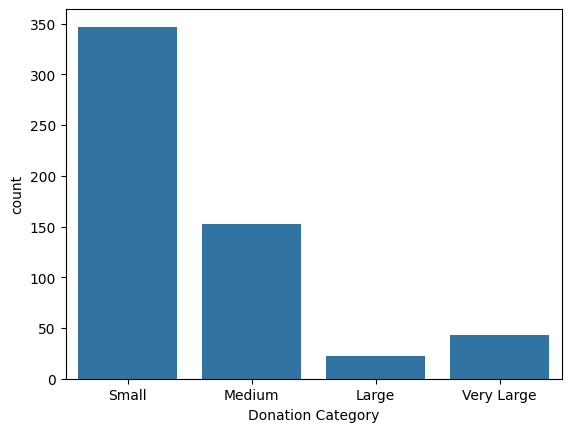

In [6]:
# Example segmentation
annual_campaigns['Donation Category'] = pd.cut(annual_campaigns['Donation Amount'], bins=[0, 100, 500, 1000, float('inf')],
                                 labels=['Small', 'Medium', 'Large', 'Very Large'])
sns.countplot(x='Donation Category', data=annual_campaigns)
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_3120\1664240460.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\gaura\AppData\Local\Temp\ipykernel_3120\1664240460.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


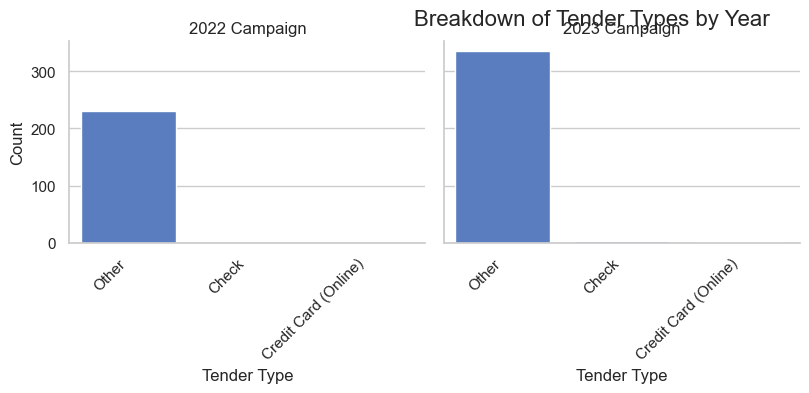

In [7]:
# Ensure the 'Donation Date' column is a datetime object
annual_campaigns['Donation Date'] = pd.to_datetime(annual_campaigns['Donation Date'])

# Extract the year from 'Donation Date'
annual_campaigns['Year'] = annual_campaigns['Donation Date'].dt.year

# Set a prettier style
sns.set_theme(style="whitegrid", palette="muted")

# Create the FacetGrid
g = sns.FacetGrid(
    annual_campaigns, 
    col="Year", 
    col_wrap=3, 
    height=4, 
    sharex=False, 
    sharey=True
)

# Apply countplot to each subplot
g.map(
    sns.countplot, 
    'Tender Type', 
    order=annual_campaigns['Tender Type'].value_counts().index
)

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add titles, axis labels, and adjust layout
g.set_titles("{col_name} Campaign")
g.set_axis_labels("Tender Type", "Count")
g.tight_layout()

# Add a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Breakdown of Tender Types by Year", fontsize=16)

# Show the plot
plt.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_3120\1202079491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Account Type', y='Donation Amount', data=annual_campaigns, width=0.6, palette="pastel")


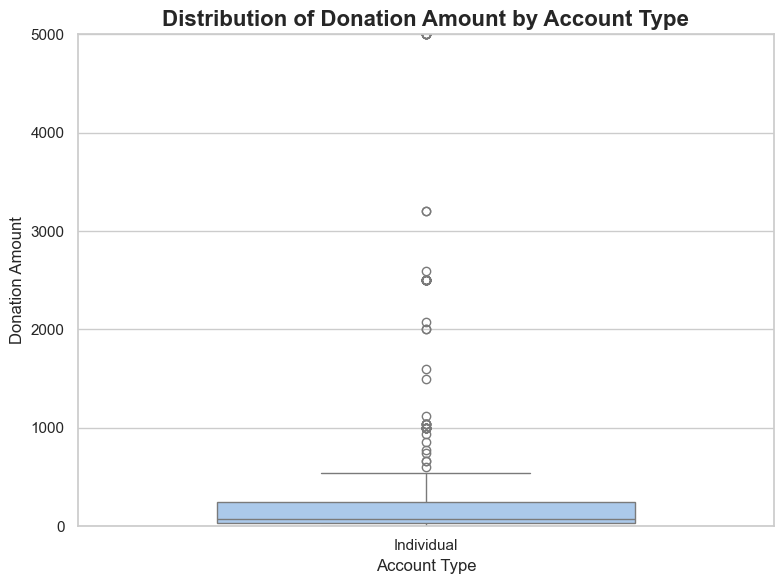

In [8]:
# Set a clean style
sns.set_theme(style="whitegrid")

# Create a boxplot (outliers will be shown as points automatically)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Account Type', y='Donation Amount', data=annual_campaigns, width=0.6, palette="pastel")

# Add labels and title
plt.title("Distribution of Donation Amount by Account Type", fontsize=16, fontweight='bold')
plt.xlabel("Account Type", fontsize=12)
plt.ylabel("Donation Amount", fontsize=12)

# Adjust y-axis to focus on relevant range if necessary
plt.ylim(0, annual_campaigns['Donation Amount'].quantile(0.99))  # Excludes extreme outliers (e.g., top 1%)

plt.tight_layout()
plt.show()

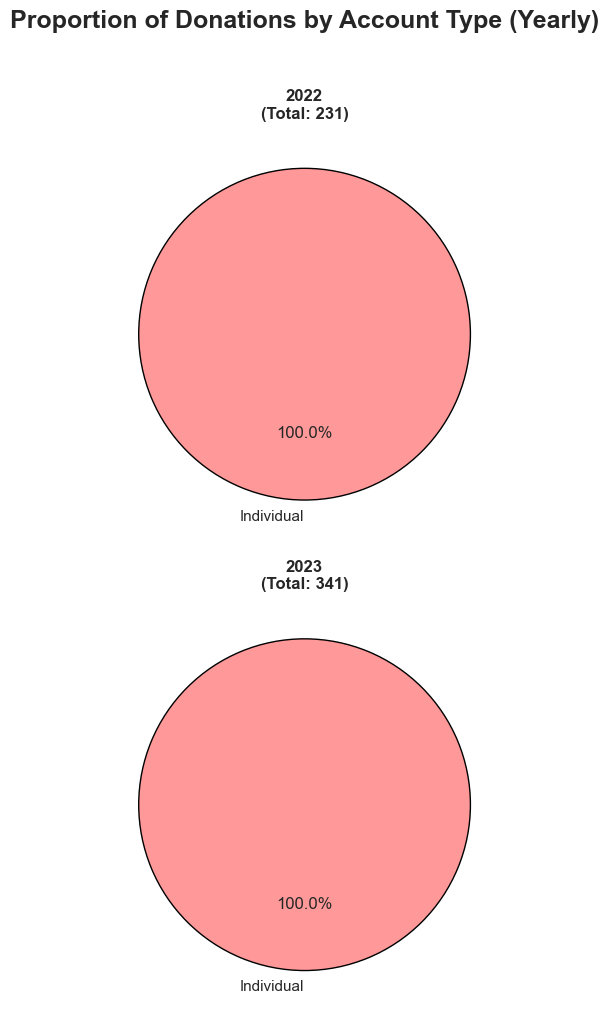

In [9]:
# Ensure 'Donation Date' is parsed as a datetime object and extract the year
annual_campaigns['Year'] = pd.to_datetime(annual_campaigns['Donation Date']).dt.year

# Group data by year and account type to count the number of donations
grouped_data = annual_campaigns.groupby(['Year', 'Account Type'])['Donation ID'].count().unstack()

# Loop through each year and create a pie chart
years = grouped_data.index
fig, axes = plt.subplots(nrows=2, ncols=(len(years) + 1) // 2, figsize=(15, 10))

axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    year_data = grouped_data.loc[year]
    year_data.plot.pie(
        labels=year_data.index,
        autopct='%1.1f%%',
        startangle=90,
        ax=ax,
        colors=["#FF9999", "#66B2FF"],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    ax.set_title(f"{year}\n(Total: {year_data.sum()})", fontsize=12, fontweight='bold')
    ax.set_ylabel("")  # Clean y-axis

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title
plt.suptitle("Proportion of Donations by Account Type (Yearly)", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_3120\1231661382.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_donations_count_top_10_with_other, x='Donation Count', y='City', palette='viridis')


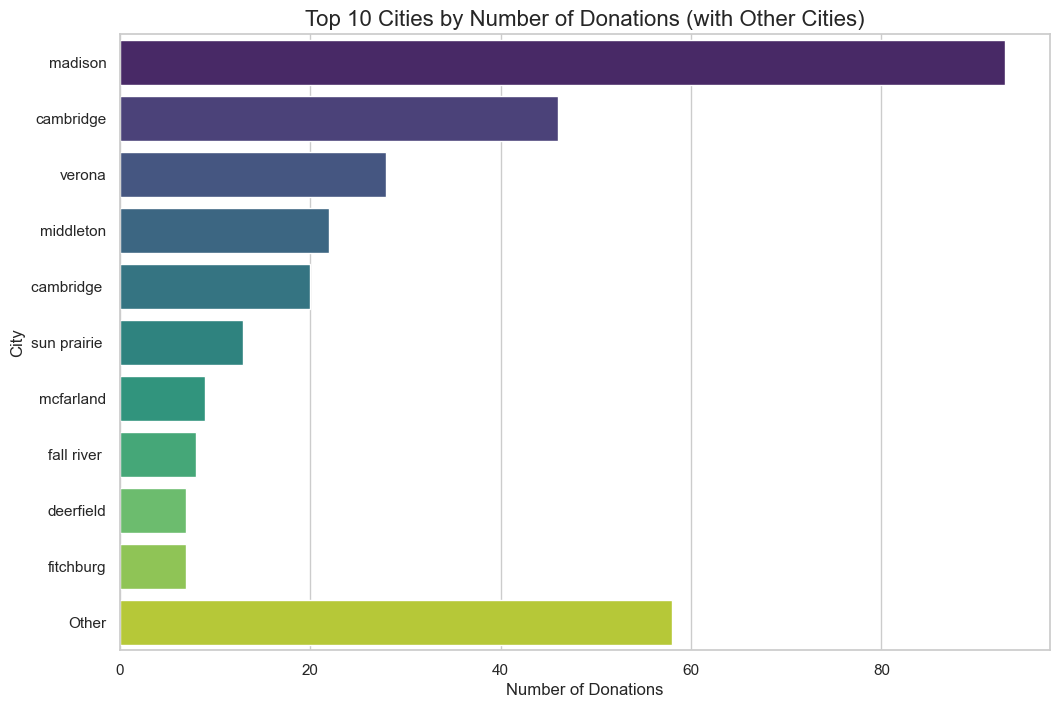

In [14]:
# Convert city names to lowercase to make case-insensitive
annual_campaigns['City'] = annual_campaigns['City'].str.lower()

# Count the number of donations per city
city_donations_count = annual_campaigns.groupby('City').size().reset_index(name='Donation Count')

# Sort by donation count
city_donations_count = city_donations_count.sort_values(by='Donation Count', ascending=False)

# Get the total donations for cities outside the top 10
other_cities = city_donations_count.tail(len(city_donations_count) - 10).sum()['Donation Count']

# Create a row for the "Other" category
other_row = pd.DataFrame({'City': ['Other'], 'Donation Count': [other_cities]})

# Append the "Other" row to the top 10 cities data
city_donations_count_top_10_with_other = pd.concat([city_donations_count.head(10), other_row])

# Plot the cities with the highest number of donations, including "Other"
plt.figure(figsize=(12, 8))
sns.barplot(data=city_donations_count_top_10_with_other, x='Donation Count', y='City', palette='viridis')
plt.title('Top 10 Cities by Number of Donations (with Other Cities)', fontsize=16)
plt.xlabel('Number of Donations', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()